In [1]:
%display latex

In [2]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

import matplotlib
import matplotlib.pyplot as plt
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield
        
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'sans',
    'text.usetex': True,
    'pgf.rcfonts': False,
    "axes.labelsize": 8,
    "font.size": 8,
})
textwidth = 6.26894

In [3]:
from lbuc import *
from lbuc.bondcalculus import *

## Model

In [4]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [5]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [6]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-r_bmatrj.py"' ...


In [7]:
u = (x, y) = reversed(s.x)

In [8]:
vf = vector(reversed(s.y)); vf

(0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1, -2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0)

In [9]:
def plot_box(B, **kwargs):
    if 'color' not in kwargs:
        kwargs['color'] = 'orange'
    return polygon(
        [(B[0].lower(), B[1].lower()),
         (B[0].lower(), B[1].upper()),
         (B[0].upper(), B[1].upper()),
         (B[0].upper(), B[1].lower())],
        **kwargs,
    )

In [10]:
v2 = [RIF(1,1.2), RIF(4,6)]
v3 = v2 # [RIF(1,1.1), RIF(4,5)]
v4 = [RIF(0.2, 0.4), RIF(7, 8)]
v5 = [RIF(0.4, 1.0), RIF(6, 7)]
v6 = [RIF(0.2, 0.6), RIF(2, 3)]

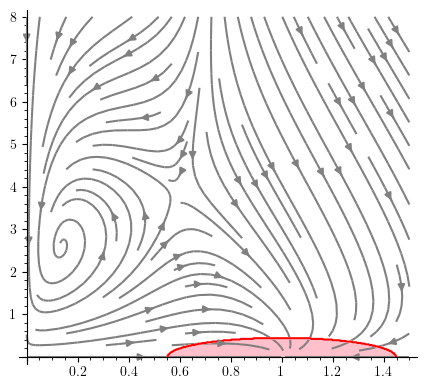

In [11]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [12]:
k = 0.8; b = 0.6; c = 0.3; e = 0.05; f = 2

In [13]:
s4 = m.process("[0.35, 0.4] Whelk || [0.1, 0.5] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.35, 0.4] Whelk || [0.1, 0.5] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-i3h70vcu.py"' ...


## Double start jump

In [14]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 < 0.2)

In [15]:
Qbox = [RIF(0, 0.31), RIF(1.5, 4)]

In [16]:
Q = (  Atomic(var("Whelk") < Qbox[0].upper())
     & Atomic(var("Whelk") > Qbox[0].lower())
     & Atomic(var("Lobster") < Qbox[1].upper())
     & Atomic(var("Lobster") > Qbox[1].lower()) )

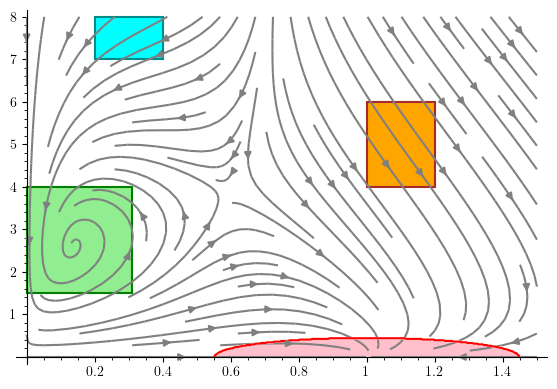

In [17]:
p1 = p
p1 += plot_box(v2, color='orange', edgecolor='brown', thickness=1.5)
p1 += plot_box(Qbox, color='lightgreen', edgecolor='green', thickness=1.5)
p1 += plot_box(v4, color='cyan', edgecolor='darkcyan', thickness=1.5)
p1.set_aspect_ratio(1/8)
p1.save("whelks-phase-portrait.pdf")
p1

## First prop

In [18]:
def plot_reach(s, duration=10, poly=None, color='blue', **kwargs):
    kwargs_ = dict(
        order=5, step=(0.01, 0.5),
        precondition=1,
        estimation=1e-3,
        integrationScheme=2,
        cutoff_threshold=1e-7,
        symbolic_composition=True,
    )
    kwargs_.update(kwargs)
    reach = s.reach(duration, **kwargs_)
    return reach.sage_interval_plot(
        str(s.varmap["Whelk"]), str(s1.varmap["Lobster"]),
        poly=poly)

In [19]:
s1 = m.process("[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-14i4zoqw.py"' ...


In [20]:
s2 = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-_6vg1t8j.py"' ...


In [21]:
s1.varmap["Whelk"]

x1

In [30]:
kwargs = dict(step=(0.01,0.1), order=7, estimation=1e-6, cutoff_threshold=1e-7, integration_method=2)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


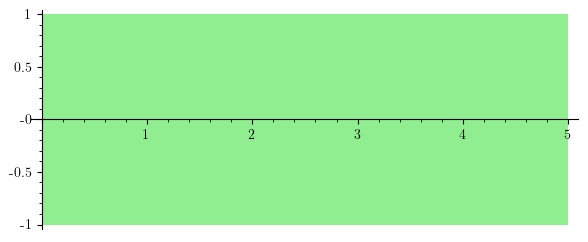

In [31]:
with suppress_stdout():
    sig = F(RIF(0, 10), Q).signal_for_system(s1, 5, **kwargs)

sig.plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


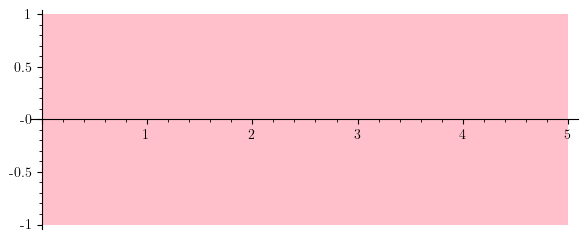

In [32]:
with suppress_stdout():
    sig = F(RIF(0, 5), G(RIF(0, 5), P)).signal_for_system(s1, 5, **kwargs)
    
sig.plot()

## Jump between regions

In [33]:
s3 = m.process("[0, 1.4] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0, 1.4] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-9clstz4v.py"' ...


In [34]:
with suppress_stdout():
    sig = U(F(RIF(0, 10), Q), RIF(2,4), "[0.9, 1.1] Whelk" >> F(RIF(0, 5), G(RIF(0, 5), P))).signal_for_system(s1, 5, **kwargs)
    
sig.plot()

KeyboardInterrupt: 

In [35]:
R = ( Atomic(b*(1 - var("Whelk")) - c*(k - var("Whelk"))*var("Lobster") < -0.3)
    | Atomic(b*(1 - var("Whelk")) - c*(k - var("Whelk"))*var("Lobster") > 0.11)
    | Atomic(var("Whelk") > 0.8) )

In [36]:
W = (( Atomic(f*var("Whelk")*(k - var("Whelk")) - e*(1 + var("Lobster")) < -0.1 )
    | Atomic(f*var("Whelk")*(k - var("Whelk")) - e*(1 + var("Lobster")) > 0.2 ) )
    & Atomic(var("Whelk") > 0.05))

In [37]:
csigR = R.context_signal_for_system(s3, 0, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[0 .. 8], [-6.6610000000000012e-17 .. 1.4000000000000002]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function base_context_signal.<locals>.<lambda> at 0x7f2c3d1da280>, reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(-Lobster*(-0.300000000000000*Whelk + 0.240000000000000) - 0.600000000000000*Whelk + 0.600000000000000 < -0.300000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=7, estimation=1.00000000000000e-6, cutoff_threshold=1.00000000000000e-7, integration_method=2, instrumentor=<flows

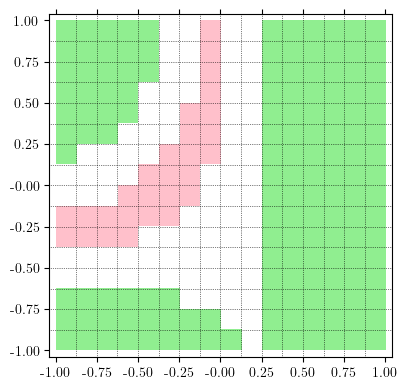

In [38]:
with suppress_stdout():
    plo = csigR.plot_histogram2d(4, flip=True)
    
plo

In [39]:
def plo(csig, n):
    with suppress_stdout():
        plon = csig.plot_histogram2d(n, flip=True)
        
    return plon

In [40]:
def csig_as_graph_data(csig, n):
    verticies = [csig.coordinate]
    edges = []
    data = {
        csig.coordinate: (
            len(csig.symbolic_coordinate) > 1,
             csig.signal(0),
        ),
    }
    
    if n > 0:
        for child in csig.children:
            v,e,d = csig_as_graph_data(child, n - 1)
            verticies.extend(v)
            edges.append((csig.coordinate, child.coordinate))
            edges.extend(e)
            data = {**d, **data}
            
    return verticies, edges, data


def csig_as_graph(csig, n):
    v,e,d = csig_as_graph_data(csig, n)
    return Graph([v,e])

In [41]:
help(Graph)

Help on class Graph in module sage.graphs.graph:

class Graph(sage.graphs.generic_graph.GenericGraph)
 |  Graph(data=None, pos=None, loops=None, format=None, weighted=None, data_structure='sparse', vertex_labels=True, name=None, multiedges=None, convert_empty_dict_labels_to_None=None, sparse=True, immutable=False)
 |  
 |  Undirected graph.
 |  
 |  A graph is a set of vertices connected by edges. See the
 |  :wikipedia:`Graph_(mathematics)` for more information. For a collection of
 |  pre-defined graphs, see the :mod:`~sage.graphs.graph_generators` module.
 |  
 |  A :class:`Graph` object has many methods whose list can be obtained by
 |  typing ``g.<tab>`` (i.e. hit the 'tab' key) or by reading the documentation
 |  of :mod:`~sage.graphs.graph`, :mod:`~sage.graphs.generic_graph`, and
 |  :mod:`~sage.graphs.digraph`.
 |  
 |  INPUT:
 |  
 |  By default, a :class:`Graph` object is simple (i.e. no *loops* nor *multiple
 |  edges*) and unweighted. This can be easily tuned with the appro

limit_output extension: Maximum message size of 10000 exceeded with 1010360 characters

In [42]:
csig_as_graph_data(csigR, 1)

([(), (0,), (1,), (2,), (3,)],
 [((), (0,)), ((), (1,)), ((), (2,)), ((), (3,))],
 {(3,): (False, None),
  (2,): (False, None),
  (1,): (False, None),
  (0,): (False, None),
  (): (False, None)})

In [43]:
csigR.children[1].children[0].children[1].children[1].reach_level

1

In [44]:
LabelledOrderedTree

<class 'sage.combinat.ordered_tree.LabelledOrderedTree'>

In [72]:
def csig_as_labelled_ordered_tree_physical(csig, n):
    if n == 0 or csig.children[0].reach_level == 1:
        children = []
    else:
        children = [
            csig_as_labelled_ordered_tree_physical(c, n - 1)
            for c in csig.children
        ]
    coordinate = csig.coordinate
        
    return LabelledOrderedTree(children,
                               label=''.join(map(str, coordinate)))

In [ ]:
def csig_as_labelled_ordered_tree(csig, n):
    if n == 0:
        children = []
    else:
        children = [
            csig_as_labelled_ordered_tree(c, n - 1)
            for c in csig.children
        ]
        
    coordinate = csig.coordinate
    #symbolic = len(csig.symbolic_coordinate) > 1
    #val = csig.signal(0)
        
    return LabelledOrderedTree(children,
                               label=''.join(map(str, coordinate)))

In [46]:
def csig_edge_colors(csig, n):
    edge_colors = {}
    
    if n > 0:
        for child in csig.children:
            is_symbolic = (
                len(child.symbolic_coordinate)
                    > len(csig.symbolic_coordinate)
            )
            edge_colors[(''.join(map(str, csig.coordinate)),
                         ''.join(map(str, child.coordinate)))] = (
                'red' if is_symbolic else 'blue'
            ) 
            edge_colors = {**edge_colors,
                           **csig_edge_colors(child, n - 1)}

    return edge_colors

In [47]:
def csig_first_physicals(csig, n):
    first_physicals = []
    
    children = csig.children
    
    if csig.children[0].reach_level == 1:
        first_physicals.append(csig.coordinate)
    
    if n > 0:
        for child in csig.children:
            first_physicals.extend(csig_first_physicals(child, n - 1))

    return first_physicals

In [48]:
first_physicals = csig_first_physicals(csigR, 4)

 ==> creating ContextSignal with coord=(0, 0, 0, 0, 0), signal = <function base_context_signal.<locals>.<lambda> at 0x7f2c3d1da280>, reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(-Lobster*(-0.300000000000000*Whelk + 0.240000000000000) - 0.600000000000000*Whelk + 0.600000000000000 < -0.300000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=7, estimation=1.00000000000000e-6, cutoff_threshold=1.00000000000000e-7, integration_method=2, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f2c3d17f580>, print_timings=False, unpreconditioning_order=7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=None
var_names = [b'local_t', b'x0', b'x1']
res = b'(([-0.9000000000 , -0.8999999999]) + ([0.5999999999 , 0.6000000000] * x1) + ([0.2399999999 , 0.2400000000] * x0) + ([-0.3000000000 , -0.2999999999] * x0 * x1)

limit_output extension: Maximum message size of 10000 exceeded with 42305 characters

In [49]:
first_physicals

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0, 0),
 (3, 1, 0, 1),
 (3, 1, 0, 2),
 (3, 1, 0, 3),
 (3, 1, 1, 0),
 (3, 1, 1, 1),
 (3, 1, 1, 2),
 (3, 1, 1, 3),
 (3, 1, 2, 0),
 (3, 1, 2, 1),
 (3, 1, 2, 2),
 (3, 1, 2, 3),
 (3, 1, 3, 0),
 (3, 1, 3, 1),
 (3, 1, 3, 2),
 (3, 1, 3, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0, 0),
 (3, 3, 0, 1),
 (3, 3, 0, 2),
 (3, 3, 0, 3),
 (3, 3, 1, 0),
 (3, 3, 1, 1),
 (3, 3, 1, 2),
 (3, 3, 1, 3),
 (3, 3, 2, 0),
 (3, 3, 2, 1),
 (3, 3, 2, 2),
 (3, 3, 2, 3),
 (3, 3, 3, 0),
 (3, 3, 3, 1),
 (3, 3, 3, 2),
 (3, 3, 3, 3)]

In [50]:
from lbuc.reach_trees import coordinate_to_space_domain

In [51]:
def boxes(csig, n):
    k = 2**n
    top_level = [RIF(0, k) - 0.5, RIF(0, k) - 0.5]
    physicals = csig_first_physicals(csig, n)
    intervals = [coordinate_to_space_domain(2, physical, top_level)
                 for physical in physicals]
    return intervals

In [52]:
def box_to_polygon(box, flip=False):
    x, y = box
    if flip:
        y, x = x, y
    xl, xu = x.endpoints()
    yl, yu = y.endpoints()
    return polygon([(xl, yl), (xu, yl), (xu, yu), (xl, yu)], fill=False, color='black', thickness=1)

In [53]:
from functools import partial

In [54]:
def boxplt(csig, n):
    return csig.plot_histogram2d(n, flip=True) + sum(
        list(map(partial(box_to_polygon, flip=True),
                 boxes(csigR, n))),
        Graphics(),
    )

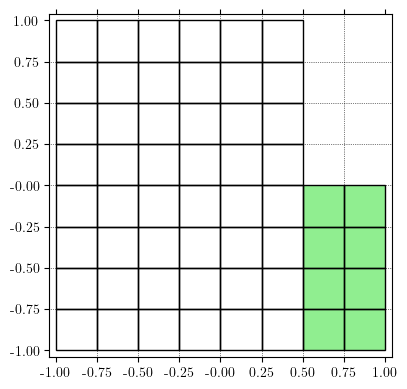

In [55]:
boxplt(csigR, 3)

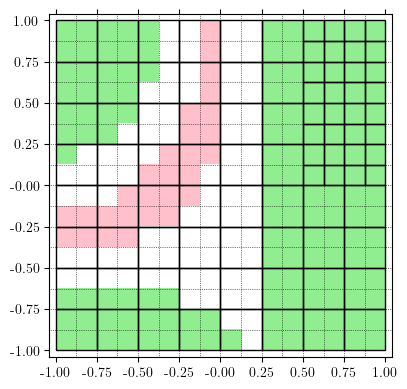

In [56]:
boxplt(csigR, 4)

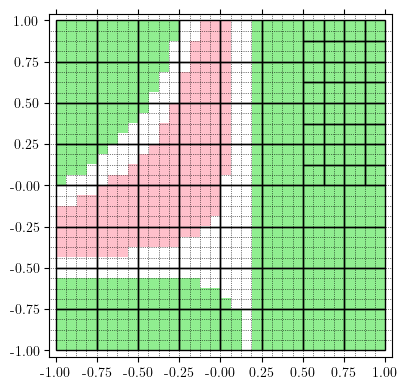

In [57]:
with suppress_stdout():
    res = boxplt(csigR, 5)

#res.save("csigboxplt.pdf")
#res.save("csigboxplt.pgf")
res

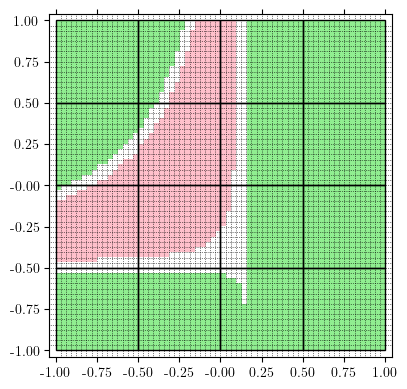

In [125]:
with suppress_stdout():
    res = boxplt(csigR, 6)

#res.save("csigboxplt.pdf")
#res.save("csigboxplt.pgf")
res

In [112]:
with suppress_stdout():
    res = sum(
        list(map(partial(box_to_polygon, flip=True),
                 boxes(csigR, 7))),
        Graphics(),
    )

#res.save("7tree.pdf")
#res.save("7tree.pgf")

KeyboardInterrupt: 

In [127]:
plo(csigR,4) + boxplt

TypeError: other (=<function boxplt at 0x7f1e64d8e790>) must be a Graphics objects

In [ ]:
csigR.children[1].children[1].children[3].reach_level

In [61]:
edcols = csig_edge_colors(csigR, 4)

In [62]:
with open('edcols.txt', 'w') as f:
    f.write(str(edcols))

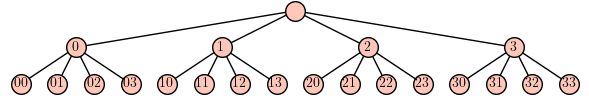

In [63]:
csig_as_labelled_ordered_tree(csigR, 2).plot()

In [64]:
def tree_map(f, tree):
    return LabelledOrderedTree([tree_map(f, c) for c in tree],
                               label=f(tree.label()))

In [65]:
repr(list(csig_as_labelled_ordered_tree(csigR, 2)))

'[0[00[], 01[], 02[], 03[]], 1[10[], 11[], 12[], 13[]], 2[20[], 21[], 22[], 23[]], 3[30[], 31[], 32[], 33[]]]'

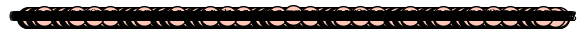

In [66]:
t = csig_as_labelled_ordered_tree(csigR, 5)
t.plot()

In [ ]:
g = t.to_undirected_graph()
g.plot()

In [67]:
t = csig_as_labelled_ordered_tree(csigR, 4)
g = t.to_undirected_graph()
edge_colors = csig_edge_colors(csigR, 4)
g.set_latex_options(
    graphic_size=(5,5),
    vertex_size=0.2,
    edge_thickness=0.1,
    edge_color='gray',
    vertex_color='black',
    vertex_label_color='red',
    format='dot2tex', prog='twopi',
    edge_colors=edge_colors,
#    edge_colors = {[('20', '201')]: 'red'}
#    subgraph_clusters=[[,2)] + [(0,2,i) for i in range(4)]],
)
s = latex(g)
with open("graph-tex/graph2.tex", 'w') as f:
    f.write(s)

In [74]:
t = csig_as_labelled_ordered_tree_physical(csigR, 5)
g = t.to_undirected_graph()
#edge_colors = csig_edge_colors(csigR, 4)
g.set_latex_options(
    graphic_size=(5,5),
    vertex_size=0.2,
    edge_thickness=0.1,
    edge_color='gray',
    vertex_color='black',
    vertex_label_color='red',
    format='dot2tex', prog='twopi',
#    edge_colors=edge_colors,
#    edge_colors = {[('20', '201')]: 'red'}
#    subgraph_clusters=[[,2)] + [(0,2,i) for i in range(4)]],
)
s = latex(g)
with open("graph-tex/graph3.tex", 'w') as f:
    f.write(s)

In [ ]:
csig_as_graph(csigR, 2).plot(layout='tree', tree_root=()).show()

In [ ]:
t.plot()

In [ ]:
csigR

In [ ]:
csigR.coordinate

In [ ]:
csigR.restriction_method

In [ ]:
csigR.children[0]._reach_level

In [ ]:
csigR.children[1]._reach_level

In [ ]:
csigR.children[1].children[1]._reach_level

In [ ]:
with suppress_stdout():
    sc = csigR.children[1].children[1].children[1].children[1].children[1].symbolic_coordinate
    
sc

In [ ]:
dir(csigR)

In [ ]:
help(Graph)

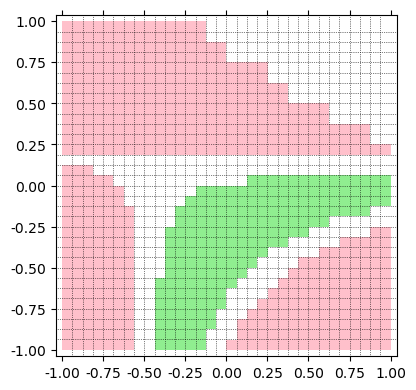

In [44]:
with suppress_stdout():
    plo = (~csigR).plot_histogram2d(5)
    
plo

In [ ]:
csigW = W.context_signal_for_system(s3, 0, **kwargs)

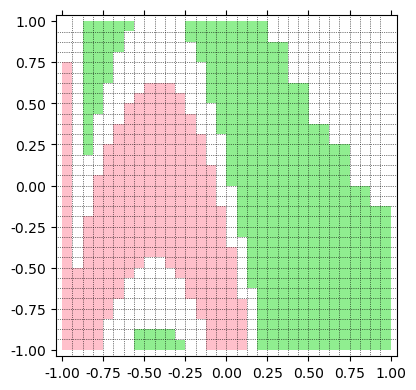

In [193]:
with suppress_stdout():
    plo = csigW.plot_histogram2d(5, flip=True)
    
plo

In [76]:
csign1 = F(RIF(0, 10), Q).context_signal_for_system(s3, 0, use_masks=True, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[0 .. 8], [-6.6610000000000012e-17 .. 1.4000000000000002]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function base_context_signal.<locals>.<lambda> at 0x7f2c33094430>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f2c33093f40>
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Whelk < 0.310000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=7, estimation=1.00000000000000e-6, cutoff_threshold=1.00000000000000e-7, integration_method=2, instrumentor=<flowstar.instrumentation.AggregateMetric object a

In [ ]:
with suppress_stdout():
    plo2 = csign1.plot_histogram2d(5, flip=True)

plo2

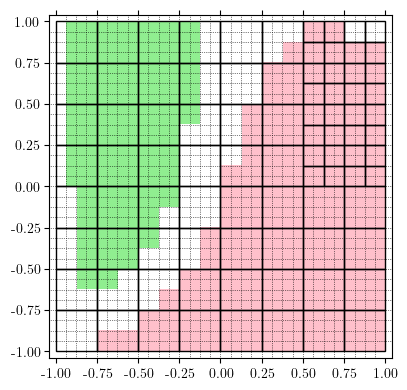

In [77]:
with suppress_stdout():
    plo2b = boxplt(csign1, 5)

plo2b

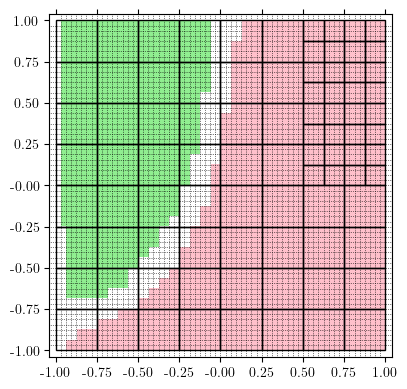

In [82]:
with suppress_stdout():
    plo2b = boxplt(csign1, 6)

plo2b

In [199]:
plo2b.save("grid-histogram-1.pgf")

In [78]:
csign2 = F(RIF(0, 5), G(RIF(0, 5), P)).context_signal_for_system(s3, 0, use_masks=True, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[0 .. 8], [-6.6610000000000012e-17 .. 1.4000000000000002]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=7, estimation=1.00000000000000e-6, cutoff_threshold=1.00000000000000e-7, integration_method=2, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f2c33ca5500>, print_timings=False, unpreconditioning_order=7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f2c1fff7100>, ctx_mask

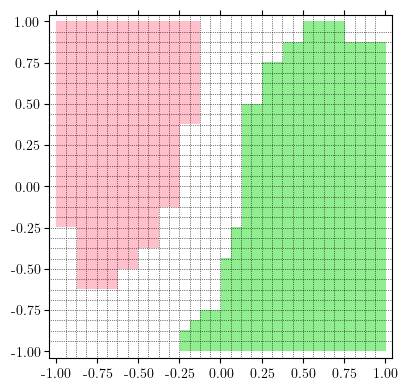

In [79]:
with suppress_stdout():
    plo3 = csign2.plot_histogram2d(5, flip=True)


plo3

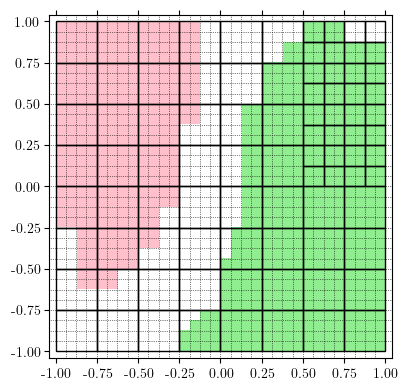

In [80]:
with suppress_stdout():
    plo3b = boxplt(csign2, 5)

plo3b

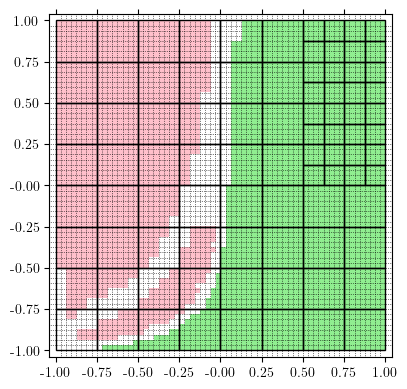

In [81]:
with suppress_stdout():
    plo3b = boxplt(csign2, 6)

plo3b

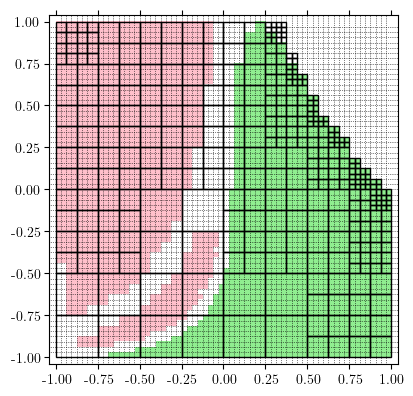

In [206]:
plo3b

In [83]:
plo2b.save("grid-histogram-3.pgf")
plo2b.save("grid-histogram-3.pdf")
plo3b.save("grid-histogram-4.pgf")
plo3b.save("grid-histogram-4.pdf")

In [ ]:
plo4 = (csign1 | csign2).plot_histogram2d(5)

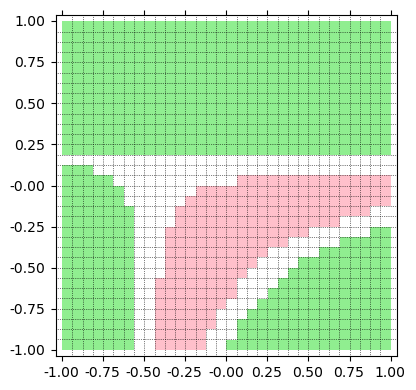

In [57]:
csigR.plot_histogram2d(5)

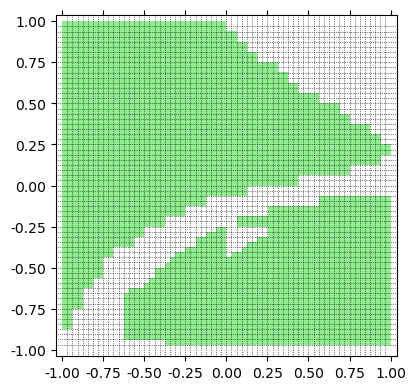

In [149]:
with suppress_stdout():
    plo4 = (csign1 | csign2).plot_histogram2d(6)

plo4

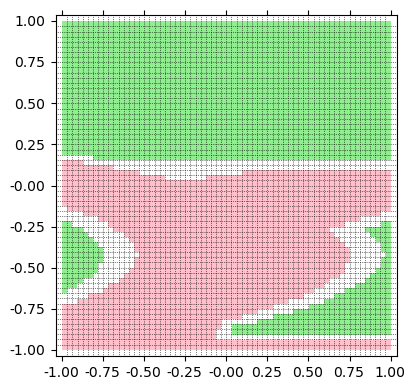

In [113]:
with suppress_stdout():
    plo5 = (csigW & csigR).plot_histogram2d(6)

plo5

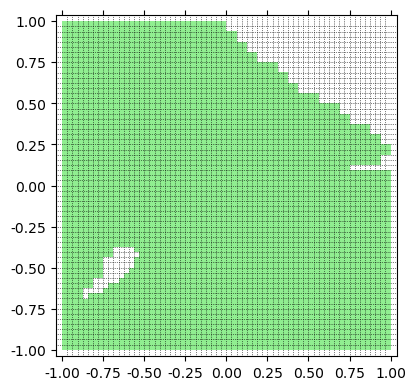

In [150]:
with suppress_stdout():
    plo6 = (~csigW | ~ csigR | csign1 | csign2).plot_histogram2d(6)
    
plo6

 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000

 ==> creating ContextSignal with coord=(0, 1, 0, 2, 1, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 2, 1, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 2, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 2, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 2, 1, 3), signal = Signal([0.0000000000000000 .. -0.000000000000000

 ==> creating ContextSignal with coord=(0, 1, 3, 2, 2, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3, 2, 2, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3, 2, 2, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3, 2, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3, 2, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], 

 ==> creating ContextSignal with coord=(0, 2, 3, 2, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3, 2, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3, 2, 3, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], 

 ==> creating ContextSignal with coord=(0, 3, 3, 3, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3, 3, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3, 3, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3, 3, 2, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3, 3, 2, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 =

 ==> creating ContextSignal with coord=(1, 0, 3, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 3, 1, 0, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 3, 1, 0, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 3, 1, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 3, 1, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000],

 ==> creating ContextSignal with coord=(1, 1, 2, 2, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2, 2, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2, 2, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2, 2, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2, 2, 2, 0), signal = Signal([0.0000000000000000 .. -0.000000000000000

 ==> creating ContextSignal with coord=(1, 2, 2, 1, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2, 1, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2, 1, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.000000

 ==> creating ContextSignal with coord=(1, 3, 1, 2, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1, 2, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.000000

 ==> creating ContextSignal with coord=(2, 0, 0, 2, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 0, 2, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 0, 2, 0, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 0, 2, 0, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 0, 2, 1, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], 

 ==> creating ContextSignal with coord=(2, 0, 3, 2, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3, 2, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3, 2, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True

 ==> creating ContextSignal with coord=(2, 1, 3, 2, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3, 2, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3, 2, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3, 2, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating Con

 ==> creating ContextSignal with coord=(2, 2, 2, 2, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2, 2, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2, 2, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2, 2, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], 

 ==> creating ContextSignal with coord=(2, 3, 3, 0, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 3, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 3, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 3, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 3, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], True)], mask=None)

 ==> creating ContextSignal with coord=(3, 0, 3, 1, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3, 1, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3, 1, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3, 1, 0, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3, 1, 0, 3), signal = Signal([0.0000000000000000 .. -0.000000000000000

 ==> creating ContextSignal with coord=(3, 1, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2, 3, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2, 3, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2, 3, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.000000

 ==> creating ContextSignal with coord=(3, 2, 3, 0, 0, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3, 0, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3, 0, 0, 1), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3, 0, 0, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3, 0, 0, 2), signal = Signal([0.0000000000000000 .. -0.000000000000000

 ==> creating ContextSignal with coord=(3, 3, 3, 1, 2, 2), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3, 1, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3, 1, 2, 3), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3, 1, 3, 0), signal = Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3, 1, 3, 0), signal = Signal([0.0000000000000000 .. -0.000000000000000

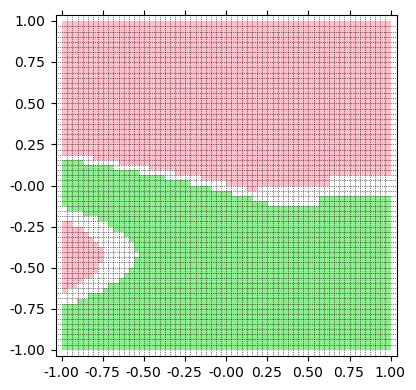

In [124]:
(~csigW | csign1).plot_histogram2d(6)